In [2]:
import requests
from bs4 import BeautifulSoup as bs

In [3]:
# 请求URL
url = 'https://dy.163.com/article/FG6H9G600514R9M0.html'

# 获取页面内容
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/74.0.3729.131 Safari/537.36'}
html = requests.get(url, headers=headers, timeout=10)
content = html.text

# 通过content创建beautifulSoup对象
soup = bs(content, 'html.parser', from_encoding='utf-8')
print(soup.title)

<title>端午假期国内旅游市场平稳有序_网易订阅</title>


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:185: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [5]:
# 获取网易新闻文章内容的class和tag
# 通过F12发现该篇文章的内容处在 class = content 的div下
# 通过遍历soup中所有的div获取对应的内容
p_div = soup.find_all('div', class_='content')
details = ''
for item in p_div:
    details = item.find_all(['p'], class_='')
print(details)

[<p>　　端午假期，游客在湖北荆州方特东方神画主题乐园游玩。<br> 黄志刚摄(影像中国)</br></p>, <p>　　本报北京6月27日电(记者王珂、郑海鸥、张璁)文化和旅游部27日发布信息显示：端午假期三天全国旅游市场总体运行平稳有序，累计接待国内游客4880.9万人次，累计实现国内旅游收入122.8亿元，未发生重大涉旅安全事故和重大投诉案件。</p>, <p>　　端午假期，各地坚持限量、预约、错峰要求，严守景区接待游客量不超过最大承载量30%这条底线，指导和支持各地通过实施分时预约和承载量精细化管理，严防景区客流超载和人员聚集。预约旅游成为景区管理的刚性要求，“出游必预约，无约不出游”已经成为游客普遍接受的理念。</p>, <p>　　在抓好常态化疫情防控的同时，各地开展丰富多彩的旅游宣传活动，推出黄河风情水韵游、追寻红色信仰游、户外露营体验游等主题线路产品，满足游客多元化假日旅游需求。红色旅游、乡村旅游、生态旅游、“文化遗产 旅游”和旅游民宿成为假日旅游热点，自驾游、亲子游、家庭游持续升温，夜间旅游活动增多，成为假日旅游新亮点。</p>, <p>　　各地公安交管部门针对假期进出城路段、重点景区周边道路拥堵的实际情况，提前制定疏堵保畅方案，加大一线警力投入，及时处置交通事故，发布了910余万条交通安全提示信息，引导群众文明驾驶、安全出行，有效防止了严重交通拥堵情况的发生，保证了全国道路交通总体安全通畅。</p>, <p>　　《 人民日报 》( 2020年06月28日 01 版)</p>]


In [7]:
# 存储文章内容
strings = ''
for detail in details:
    string = detail.get_text().strip()
    strings = strings + string
    
print(strings)

端午假期，游客在湖北荆州方特东方神画主题乐园游玩。 黄志刚摄(影像中国)本报北京6月27日电(记者王珂、郑海鸥、张璁)文化和旅游部27日发布信息显示：端午假期三天全国旅游市场总体运行平稳有序，累计接待国内游客4880.9万人次，累计实现国内旅游收入122.8亿元，未发生重大涉旅安全事故和重大投诉案件。端午假期，各地坚持限量、预约、错峰要求，严守景区接待游客量不超过最大承载量30%这条底线，指导和支持各地通过实施分时预约和承载量精细化管理，严防景区客流超载和人员聚集。预约旅游成为景区管理的刚性要求，“出游必预约，无约不出游”已经成为游客普遍接受的理念。在抓好常态化疫情防控的同时，各地开展丰富多彩的旅游宣传活动，推出黄河风情水韵游、追寻红色信仰游、户外露营体验游等主题线路产品，满足游客多元化假日旅游需求。红色旅游、乡村旅游、生态旅游、“文化遗产 旅游”和旅游民宿成为假日旅游热点，自驾游、亲子游、家庭游持续升温，夜间旅游活动增多，成为假日旅游新亮点。各地公安交管部门针对假期进出城路段、重点景区周边道路拥堵的实际情况，提前制定疏堵保畅方案，加大一线警力投入，及时处置交通事故，发布了910余万条交通安全提示信息，引导群众文明驾驶、安全出行，有效防止了严重交通拥堵情况的发生，保证了全国道路交通总体安全通畅。《 人民日报 》( 2020年06月28日 01 版)


In [21]:
# 对文章进行切词
import jieba

text = jieba.cut(strings, )
text = list(text)

stopwords = [1,2,3,4,5,6,7,8,9,0,'，','.','。', '（', '）', '：', '、', '《', '》', '在', '的', '摄', '郑', '海鸥', '张璁', '王珂', 
             '成为', '接待', '管理', '本报', '必', '的', '累计', '要求', '和']
words = [x for x in text if x not in stopwords]


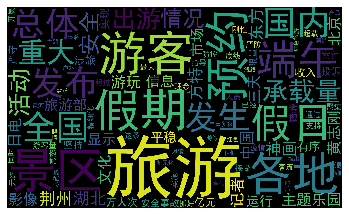

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image


text = ' '.join(words)
wc = WordCloud(font_path='simhei.ttf', max_words = 100, width = 2000, height = 1200)
wordcloud =wc.generate(text)
wordcloud.to_file("wordcloud.jpg")

plt.imshow(wordcloud)
plt.axis("off")
plt.show()